# Importando Dados

In [1]:
import tabula
import pandas as pd

df = pd.DataFrame()

pd.set_option('display.max_rows', None)

file = r"C:\Users\TEMP\Documents\TECNOFOODS\LMT\2022\FATURAMENTO-LMT REPRESENTACOES LTDA - ME - FEVEREIRO.pdf"

baseVendas = tabula.read_pdf(file, pages="all")

for i in baseVendas:
    df_table = pd.DataFrame(i)

    df = df.append(df_table)
    
display(df)

,CLIENTE,NOME DO CLIENTE,DT CRIA RG,NOTA FISCAL,VENDAS/DEVOL,MATERIAL,TEXTO BREVE MATERIAL,FATOR,CATEGORIA PRODUTO,LINHA PRODUTOS,Unnamed: 0,CONCEITO,VOL (KG),FATURAMENTO,COMISSAO
0,357217,MAURO DE BARROS VAZ,11/01/2022,000172229-5,VENDAS,F30634PBC,PROBEEF REPRODUCAO,107.0,SUP MINERAL,MAXIMA,PROBEEF,NaN,9.00,"42.793,33","4.065,37"
1,NaN,NaN,NaN,000172229-5 Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00,"42.793,33","4.065,37"
2,357217 Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00,"42.793,33","4.065,37"
3,337683,AGROPECUARIA MIMOSO LTDA,12/01/2022,000248890-5,VENDAS,F30634RPA,PROBEEF RESIST,102.0,SUP MINERAL,PERFORMA,PROBEEF RESIST,NaN,27.00,"135.544,13","12.198,97"
4,NaN,NaN,NaN,000248890-5 Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.00,"135.544,13","12.198,97"
5,337683 Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.00,"135.544,13","12.198,97"
6,415935,REINALDO MUSTAFA,19/01/2022,000249274-5,VENDAS,F30625,NUTRONPHOS OVINO 65,99.0,SUP MINERAL,ESSENCIAL,NUTRONPHOS,NaN,250.00,"1.068,01","90,78"
7,NaN,NaN,NaN,NaN,NaN,F30637PBF,PROBEEF PROTEIPEC,97.0,SUP PROTEINADO,PERFORMA,PROBEEF,NaN,1.20,"4.096,32","307,22"
8,NaN,NaN,NaN,NaN,NaN,F30637MBK,PROBEEF CONFINAL,97.0,RACAO,PERFORMA,PROBEEF CONFINAMENTO CONFINAL,NaN,1.20,"3.602,33","216,14"
9,NaN,NaN,NaN,000249274-5 Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.65,"8.766,66","614,14"


# Fazendo a Limpeza e Removendo as linhas indesejadas

In [2]:
df = df[df['MATERIAL'].notna()]

val = 0
    
for i in df['VOL (KG)']:
    if i > 100:
        val = i / 1000
        df.loc[df['VOL (KG)'] > 100, 'VOL (KG)'] = val
        

display(df)

,CLIENTE,NOME DO CLIENTE,DT CRIA RG,NOTA FISCAL,VENDAS/DEVOL,MATERIAL,TEXTO BREVE MATERIAL,FATOR,CATEGORIA PRODUTO,LINHA PRODUTOS,Unnamed: 0,CONCEITO,VOL (KG),FATURAMENTO,COMISSAO
0,357217,MAURO DE BARROS VAZ,11/01/2022,000172229-5,VENDAS,F30634PBC,PROBEEF REPRODUCAO,107.0,SUP MINERAL,MAXIMA,PROBEEF,NaN,9.00,"42.793,33","4.065,37"
3,337683,AGROPECUARIA MIMOSO LTDA,12/01/2022,000248890-5,VENDAS,F30634RPA,PROBEEF RESIST,102.0,SUP MINERAL,PERFORMA,PROBEEF RESIST,NaN,27.00,"135.544,13","12.198,97"
6,415935,REINALDO MUSTAFA,19/01/2022,000249274-5,VENDAS,F30625,NUTRONPHOS OVINO 65,99.0,SUP MINERAL,ESSENCIAL,NUTRONPHOS,NaN,0.25,"1.068,01","90,78"
7,NaN,NaN,NaN,NaN,NaN,F30637PBF,PROBEEF PROTEIPEC,97.0,SUP PROTEINADO,PERFORMA,PROBEEF,NaN,1.20,"4.096,32","307,22"
8,NaN,NaN,NaN,NaN,NaN,F30637MBK,PROBEEF CONFINAL,97.0,RACAO,PERFORMA,PROBEEF CONFINAMENTO CONFINAL,NaN,1.20,"3.602,33","216,14"
11,405716,MAHIL PARTICIPACOES EEMPREENDIMENTOS LTDA,15/01/2022,000249072-5,VENDAS,F30634RPC,PROBEEF RESIST GOLDEN,95.0,SUP MINERAL,PERFORMA,PROBEEF RESIST,NaN,36.00,"175.804,26","11.427,28"
14,407128,ZENILDO LUZ CAIRES,11/01/2022,000172219-5,VENDAS,F30634PBC,PROBEEF REPRODUCAO,95.0,SUP MINERAL,MAXIMA,PROBEEF,NaN,13.80,"56.767,89","3.689,91"
17,407563,ANDRE RIBEIRO CORREA E OUTROS,17/01/2022,000172462-5,VENDAS,F30634PBB,PROBEEF TOPMOST,100.0,SUP MINERAL,MAXIMA,PROBEEF,NaN,9.00,"36.612,89","3.295,16"
20,413112,ALVARO GROHMANN NETO,31/01/2022,000249918-5,VENDAS,F30634RPA,PROBEEF RESIST,91.0,SUP MINERAL,PERFORMA,PROBEEF RESIST,NaN,27.00,"117.945,00","4.717,80"
23,390633,MARIO HOSHIKA,10/01/2022,000172171-5,VENDAS,F30537MBA,PROBEEF CONFINAMENTO MAXIMA FAST TMR,94.0,NUCLEO,MAXIMA,PROBEEF CONFINAMENTO FAST,NaN,19.50,"112.320,00","11.232,00"


# Preenchendo os NaN com os valores acima

In [3]:
df.fillna(method='ffill', inplace=True)

display(df)


,CLIENTE,NOME DO CLIENTE,DT CRIA RG,NOTA FISCAL,VENDAS/DEVOL,MATERIAL,TEXTO BREVE MATERIAL,FATOR,CATEGORIA PRODUTO,LINHA PRODUTOS,Unnamed: 0,CONCEITO,VOL (KG),FATURAMENTO,COMISSAO
0,357217,MAURO DE BARROS VAZ,11/01/2022,000172229-5,VENDAS,F30634PBC,PROBEEF REPRODUCAO,107.0,SUP MINERAL,MAXIMA,PROBEEF,NaN,9.00,"42.793,33","4.065,37"
3,337683,AGROPECUARIA MIMOSO LTDA,12/01/2022,000248890-5,VENDAS,F30634RPA,PROBEEF RESIST,102.0,SUP MINERAL,PERFORMA,PROBEEF RESIST,NaN,27.00,"135.544,13","12.198,97"
6,415935,REINALDO MUSTAFA,19/01/2022,000249274-5,VENDAS,F30625,NUTRONPHOS OVINO 65,99.0,SUP MINERAL,ESSENCIAL,NUTRONPHOS,NaN,0.25,"1.068,01","90,78"
7,415935,REINALDO MUSTAFA,19/01/2022,000249274-5,VENDAS,F30637PBF,PROBEEF PROTEIPEC,97.0,SUP PROTEINADO,PERFORMA,PROBEEF,NaN,1.20,"4.096,32","307,22"
8,415935,REINALDO MUSTAFA,19/01/2022,000249274-5,VENDAS,F30637MBK,PROBEEF CONFINAL,97.0,RACAO,PERFORMA,PROBEEF CONFINAMENTO CONFINAL,NaN,1.20,"3.602,33","216,14"
11,405716,MAHIL PARTICIPACOES EEMPREENDIMENTOS LTDA,15/01/2022,000249072-5,VENDAS,F30634RPC,PROBEEF RESIST GOLDEN,95.0,SUP MINERAL,PERFORMA,PROBEEF RESIST,NaN,36.00,"175.804,26","11.427,28"
14,407128,ZENILDO LUZ CAIRES,11/01/2022,000172219-5,VENDAS,F30634PBC,PROBEEF REPRODUCAO,95.0,SUP MINERAL,MAXIMA,PROBEEF,NaN,13.80,"56.767,89","3.689,91"
17,407563,ANDRE RIBEIRO CORREA E OUTROS,17/01/2022,000172462-5,VENDAS,F30634PBB,PROBEEF TOPMOST,100.0,SUP MINERAL,MAXIMA,PROBEEF,NaN,9.00,"36.612,89","3.295,16"
20,413112,ALVARO GROHMANN NETO,31/01/2022,000249918-5,VENDAS,F30634RPA,PROBEEF RESIST,91.0,SUP MINERAL,PERFORMA,PROBEEF RESIST,NaN,27.00,"117.945,00","4.717,80"
23,390633,MARIO HOSHIKA,10/01/2022,000172171-5,VENDAS,F30537MBA,PROBEEF CONFINAMENTO MAXIMA FAST TMR,94.0,NUCLEO,MAXIMA,PROBEEF CONFINAMENTO FAST,NaN,19.50,"112.320,00","11.232,00"


# Limpando NaN e Excluindo colunas indesejadas

In [4]:
cols = [0, 3, 4, 5, 7, 8, 9, 10]

df = df.drop(df.columns[cols], axis=1)

df.dropna(axis='columns', inplace=True)

df = df.reset_index().drop(["index"], axis=1)

display(df)

,NOME DO CLIENTE,DT CRIA RG,TEXTO BREVE MATERIAL,VOL (KG),FATURAMENTO,COMISSAO
0,MAURO DE BARROS VAZ,11/01/2022,PROBEEF REPRODUCAO,9.00,"42.793,33","4.065,37"
1,AGROPECUARIA MIMOSO LTDA,12/01/2022,PROBEEF RESIST,27.00,"135.544,13","12.198,97"
2,REINALDO MUSTAFA,19/01/2022,NUTRONPHOS OVINO 65,0.25,"1.068,01","90,78"
3,REINALDO MUSTAFA,19/01/2022,PROBEEF PROTEIPEC,1.20,"4.096,32","307,22"
4,REINALDO MUSTAFA,19/01/2022,PROBEEF CONFINAL,1.20,"3.602,33","216,14"
5,MAHIL PARTICIPACOES EEMPREENDIMENTOS LTDA,15/01/2022,PROBEEF RESIST GOLDEN,36.00,"175.804,26","11.427,28"
6,ZENILDO LUZ CAIRES,11/01/2022,PROBEEF REPRODUCAO,13.80,"56.767,89","3.689,91"
7,ANDRE RIBEIRO CORREA E OUTROS,17/01/2022,PROBEEF TOPMOST,9.00,"36.612,89","3.295,16"
8,ALVARO GROHMANN NETO,31/01/2022,PROBEEF RESIST,27.00,"117.945,00","4.717,80"
9,MARIO HOSHIKA,10/01/2022,PROBEEF CONFINAMENTO MAXIMA FAST TMR,19.50,"112.320,00","11.232,00"


# Trocando os " . " e " , "

In [5]:
df["FATURAMENTO"] = df["FATURAMENTO"].apply(lambda x: float(x.replace(".","").replace(",",".")))
df["COMISSAO"] = df["COMISSAO"].apply(lambda x: float(x.replace(".","").replace(",",".")))

display(df)

,NOME DO CLIENTE,DT CRIA RG,TEXTO BREVE MATERIAL,VOL (KG),FATURAMENTO,COMISSAO
0,MAURO DE BARROS VAZ,11/01/2022,PROBEEF REPRODUCAO,9.00,42793.33,4065.37
1,AGROPECUARIA MIMOSO LTDA,12/01/2022,PROBEEF RESIST,27.00,135544.13,12198.97
2,REINALDO MUSTAFA,19/01/2022,NUTRONPHOS OVINO 65,0.25,1068.01,90.78
3,REINALDO MUSTAFA,19/01/2022,PROBEEF PROTEIPEC,1.20,4096.32,307.22
4,REINALDO MUSTAFA,19/01/2022,PROBEEF CONFINAL,1.20,3602.33,216.14
5,MAHIL PARTICIPACOES EEMPREENDIMENTOS LTDA,15/01/2022,PROBEEF RESIST GOLDEN,36.00,175804.26,11427.28
6,ZENILDO LUZ CAIRES,11/01/2022,PROBEEF REPRODUCAO,13.80,56767.89,3689.91
7,ANDRE RIBEIRO CORREA E OUTROS,17/01/2022,PROBEEF TOPMOST,9.00,36612.89,3295.16
8,ALVARO GROHMANN NETO,31/01/2022,PROBEEF RESIST,27.00,117945.00,4717.80
9,MARIO HOSHIKA,10/01/2022,PROBEEF CONFINAMENTO MAXIMA FAST TMR,19.50,112320.00,11232.00


# Plotando no Gráfico

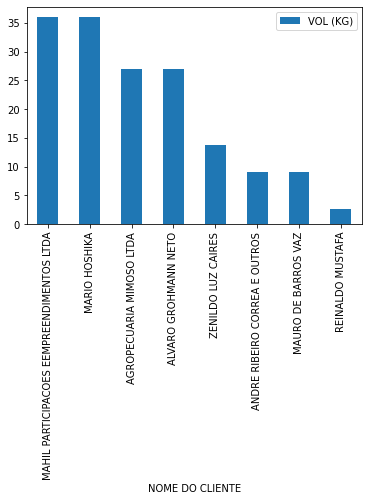

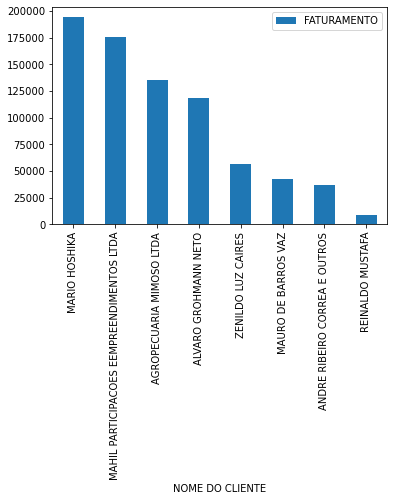

In [6]:
import matplotlib.pyplot as plt

df = df.groupby(['NOME DO CLIENTE']).sum()

df = df.reset_index()

ax3 = df.sort_values('VOL (KG)', ascending=False).plot.bar(x='NOME DO CLIENTE', y='VOL (KG)')

ax2 = df.sort_values('FATURAMENTO', ascending=False).plot.bar(x='NOME DO CLIENTE', y='FATURAMENTO')


# Incluindo Somatória

In [7]:
df = df.append({'FATURAMENTO': df['FATURAMENTO'].sum(), 
                'VOL (KG)': df['VOL (KG)'].sum(), 
                'COMISSAO': df['COMISSAO'].sum()} , ignore_index=True)

display(df)

,NOME DO CLIENTE,VOL (KG),FATURAMENTO,COMISSAO
0,AGROPECUARIA MIMOSO LTDA,27.00,135544.13,12198.97
1,ALVARO GROHMANN NETO,27.00,117945.00,4717.80
2,ANDRE RIBEIRO CORREA E OUTROS,9.00,36612.89,3295.16
3,MAHIL PARTICIPACOES EEMPREENDIMENTOS LTDA,36.00,175804.26,11427.28
4,MARIO HOSHIKA,36.00,194160.00,21052.80
5,MAURO DE BARROS VAZ,9.00,42793.33,4065.37
6,REINALDO MUSTAFA,2.65,8766.66,614.14
7,ZENILDO LUZ CAIRES,13.80,56767.89,3689.91
8,NaN,160.45,768394.16,61061.43
